In [2]:
#pip install xlrd xlwt openpyxl


In [3]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

Задачи для аналитика:
1.	Сколько раз в среднем пациент обращается в клинику за год?
2.	Срез пациентов по полу, возрасту (группы: 0-17, 18-29, 30-40, 41-50, 51-60, 61-70, 71+), услуге входа в клинику (первому приему/услуге), основному диагнозу
3.	Есть предположение, что многие пациенты к нам обращаются за вторым мнением – нужно проверить эту гипотезу: сколько человек пришли к нам на первичный прием-консультацию (+возможно, получили диагностическую услугу), но не вернулись на повторный визит. Какая корреляция этой категории с профилем врача (к какому врачу пришли – уролог, гинеколог, невролог и т.п.) и основным диагнозом
4.	Топ услуг
5.	Топ диагнозов
6.	Какая группа пациентов (пол, возраст, услуга входа):
- с самым большим количество обращений в клинику
- с самым высоким среднем чеком



In [4]:
initial_appointments = pd.read_excel('Первичные приёмы пациентов.xlsx')

In [5]:
initial_appointments.sample(10)

,источник,ЭМК,ФИО,Первый визит,Отделение,За месяц,ОЛД,Поликлиника,Стоматология,Возраст,Ср. чек за месяц,Траты за месяц,Возр. группа,Пол
2285,Запись в клинике,1737744,БАДМА-ХАЛГАЕВА Карина Савровна,2024-05-31,Лучевая диагностика,2,0,2,0,9,4930.00,128180.00,NaN,жен
1811,Запись в клинике,1239580,ЛЕ Куинь Нган,2024-02-25,Стоматология,1,0,0,1,54,1093.33,3280.00,50 - 60,жен
8510,Запись в клинике,1702571,ЗАЙЦЕВА Анна Константиновна,2024-01-11,Поликлиника,4,0,4,0,24,1341.90,28180.00,18 - 29,жен
2934,organic,1703866,ТОМАШЕВСКИЙ Антон Сергеевич,2024-01-22,Поликлиника,1,0,1,0,38,14200.00,28400.00,30 - 40,муж
5413,Запись в клинике,1733716,ЯРКОВА Елена Анатольевна,2024-05-27,Поликлиника,1,0,1,0,51,5900.00,11800.00,50 - 60,жен
7570,Запись в клинике,1745809,БОЙКО Диана Викторовна,2024-07-28,Лучевая диагностика,1,1,0,0,30,1068.50,2137.00,30 - 40,жен
7901,Запись в клинике,1386186,ЗАВОРОВСКАЯ Екатерина Дмитриевна,2024-04-13,Лучевая диагностика,2,0,2,0,36,1300.89,72850.00,30 - 40,жен
8979,Запись в клинике,1702770,ПОДБРЕЗСКАЯ Нелли Ивановна,2024-02-09,Лучевая диагностика,1,1,0,0,76,1068.50,2137.00,70+,жен
5926,Запись в клинике,1703694,КОРНИЛОВ Данила Александрович,2024-03-21,Лучевая диагностика,1,1,0,0,20,3568.50,7137.00,18 - 29,муж
9567,Запись в клинике,1742984,БОБРОВА Наталья Александровна,2024-07-06,Поликлиника,1,1,0,0,65,69611.46,348057.28,60 - 70,жен


In [6]:
f'В таблице  {initial_appointments.shape[1]} столбцов и {initial_appointments.shape[0]} строк.'

'В таблице  14 столбцов и 9924 строк.'

In [7]:
initial_appointments.columns

Index(['источник', 'ЭМК', 'ФИО', 'Первый визит', 'Отделение', 'За месяц',
       'ОЛД', 'Поликлиника', 'Стоматология', 'Возраст', 'Ср. чек за месяц',
       'Траты за месяц', 'Возр. группа', 'Пол'],
      dtype='object')

In [8]:
initial_appointments.describe(include = 'all')

,источник,ЭМК,ФИО,Первый визит,Отделение,За месяц,ОЛД,Поликлиника,Стоматология,Возраст,Ср. чек за месяц,Траты за месяц,Возр. группа,Пол
count,9924,9.924000e+03,9924,9924,9924,9924.00000,9924.000000,9924.000000,9924.000000,9924.000000,9921.000000,9.921000e+03,9356,9924
unique,7,NaN,8499,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2
top,Запись в клинике,NaN,СМИРНОВ Тихон Владимирович,NaN,Поликлиника,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 - 40,жен
freq,8174,NaN,4,NaN,5368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2484,5936
mean,NaN,1.668828e+06,NaN,2024-05-12 19:34:45.126964992,NaN,2.38029,0.572249,1.684704,0.123337,43.797763,4742.040261,5.622801e+04,NaN,NaN
min,NaN,1.052941e+06,NaN,2024-01-02 00:00:00,NaN,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN
25%,NaN,1.699022e+06,NaN,2024-03-05 00:00:00,NaN,1.00000,0.000000,0.000000,0.000000,32.000000,1068.500000,5.080000e+03,NaN,NaN
50%,NaN,1.717656e+06,NaN,2024-05-10 00:00:00,NaN,1.00000,1.000000,1.000000,0.000000,42.000000,2745.710000,1.620000e+04,NaN,NaN
75%,NaN,1.741021e+06,NaN,2024-07-20 00:00:00,NaN,3.00000,1.000000,2.000000,0.000000,57.000000,5200.000000,4.406250e+04,NaN,NaN
max,NaN,1.770684e+06,NaN,2024-09-30 00:00:00,NaN,31.00000,5.000000,27.000000,9.000000,100.000000,116019.090000,1.777481e+06,NaN,NaN


In [9]:
f'Количество строк-дубликатов  = {initial_appointments.duplicated().sum()}'

'Количество строк-дубликатов  = 0'

In [10]:
initial_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   источник          9924 non-null   object        
 1   ЭМК               9924 non-null   int64         
 2   ФИО               9924 non-null   object        
 3   Первый визит      9924 non-null   datetime64[ns]
 4   Отделение         9924 non-null   object        
 5   За месяц          9924 non-null   int64         
 6   ОЛД               9924 non-null   int64         
 7   Поликлиника       9924 non-null   int64         
 8   Стоматология      9924 non-null   int64         
 9   Возраст           9924 non-null   int64         
 10  Ср. чек за месяц  9921 non-null   float64       
 11  Траты за месяц    9921 non-null   float64       
 12  Возр. группа      9356 non-null   object        
 13  Пол               9924 non-null   object        
dtypes: datetime64[ns](1), fl

Рассмотрим пропуски в таблице:

In [11]:
pd.DataFrame(initial_appointments.isna().sum()).style.background_gradient('coolwarm')

,0
источник,0
ЭМК,0
ФИО,0
Первый визит,0
Отделение,0
За месяц,0
ОЛД,0
Поликлиника,0
Стоматология,0
Возраст,0


In [12]:
nan = initial_appointments[initial_appointments.isnull().any(axis=1)]

In [13]:
f'Пропуски (nan) в столбце Возраст.группа у пациентов в возрасте до 18 лет. Количество таких строк = {nan.shape[0]}. Укажем  "0-17".'

'Пропуски (nan) в столбце Возраст.группа у пациентов в возрасте до 18 лет. Количество таких строк = 571. Укажем  "0-17".'

In [14]:
initial_appointments['Возр. группа'].replace([None], '0-17', inplace=True)

In [15]:
initial_appointments[initial_appointments.isnull().any(axis=1)]

,источник,ЭМК,ФИО,Первый визит,Отделение,За месяц,ОЛД,Поликлиника,Стоматология,Возраст,Ср. чек за месяц,Траты за месяц,Возр. группа,Пол
655,Запись в клинике,1668946,ЖУКОВА Елена Сергеевна,2024-05-08,Стоматология,2,0,0,2,30,NaN,NaN,30 - 40,жен
5314,Запись в клинике,1745142,БЕЛОТЕЛОВА Татьяна Александровна,2024-03-19,Поликлиника,1,0,1,0,67,NaN,NaN,60 - 70,жен
9546,Запись в клинике,1422413,ТИЛЬ Александрина Олеговна,2024-05-14,Лучевая диагностика,1,1,0,0,36,NaN,NaN,30 - 40,жен


Оставшиеся пропуски заменим на 0

In [16]:
initial_appointments.fillna(0, inplace=True)

Получили таблицу без пропусков.

In [17]:
cat_col_names = ['источник', 
                 'Отделение', 
                 'Возр. группа',
                 'Пол']
for name in cat_col_names: 
    print(initial_appointments[name].unique())

['Запись в клинике' 'geo' 'classified' 'perfomance' 'organic' 'другое'
 'other']
['Лучевая диагностика' 'Поликлиника' 'Стоматология']
['30 - 40' '70+' '50 - 60' '40 - 50' '0-17' '18 - 29' '60 - 70']
['жен' 'муж']


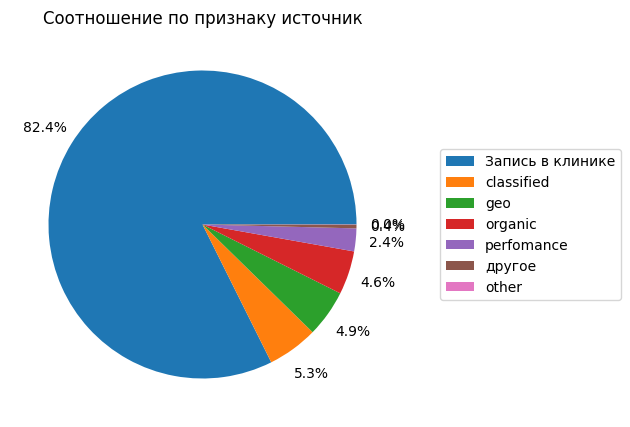

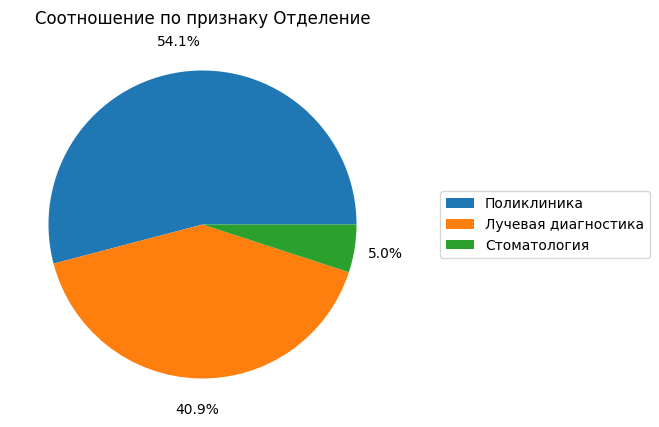

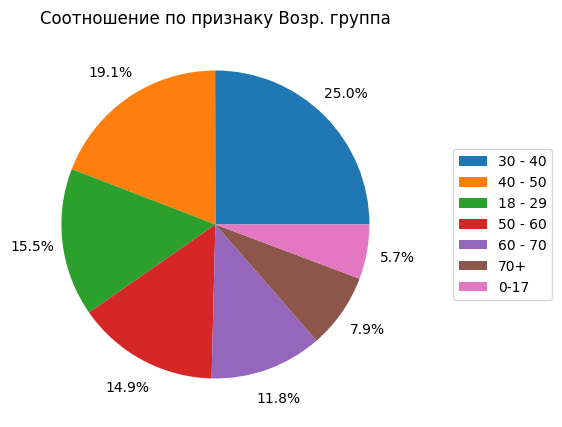

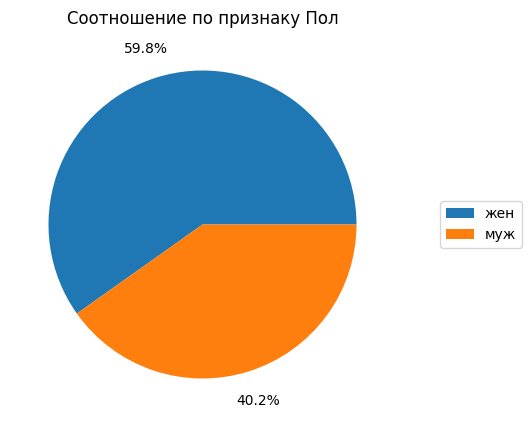

In [18]:
   
for name in cat_col_names:
    fig = plt.figure(figsize=(5, 5))     
    initial_appointments[name].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=1.2, 
                legend=True, title=f'Соотношение по признаку {name}', ylabel='', labeldistance=None)
                       
    plt.legend(bbox_to_anchor=(1.1, 0, 0.6, 1), loc="center left")
    plt.show()  

In [19]:
pd.pivot_table(initial_appointments, index='Отделение', columns=['Возр. группа', 'Пол'], values='Возраст',aggfunc='count')

Возр. группа        0-17      18 - 29      30 - 40      40 - 50      50 - 60  \
Пол                  жен  муж     жен  муж     жен  муж     жен  муж     жен   
Отделение                                                                      
Лучевая диагностика   44   64     261  214     529  404     514  299     477   
Поликлиника          193  218     599  376     765  643     555  404     389   
Стоматология          18   31      54   38      85   58      74   51      28   

Возр. группа             60 - 70       70+       
Пол                  муж     жен  муж  жен  муж  
Отделение                                        
Лучевая диагностика  253     446  188  273   92  
Поликлиника          312     331  180  274  129  
Стоматология          22      18    8    9    4

In [20]:
#initial_appointments['Первый визит'] = pd.to_datetime(initial_appointments['Первый визит']).dt.date

In [21]:
f"Данные предствлены за период {pd.to_datetime(initial_appointments['Первый визит']).dt.date.min()} по {pd.to_datetime(initial_appointments['Первый визит']).dt.date.max()}"

'Данные предствлены за период 2024-01-02 по 2024-09-30'

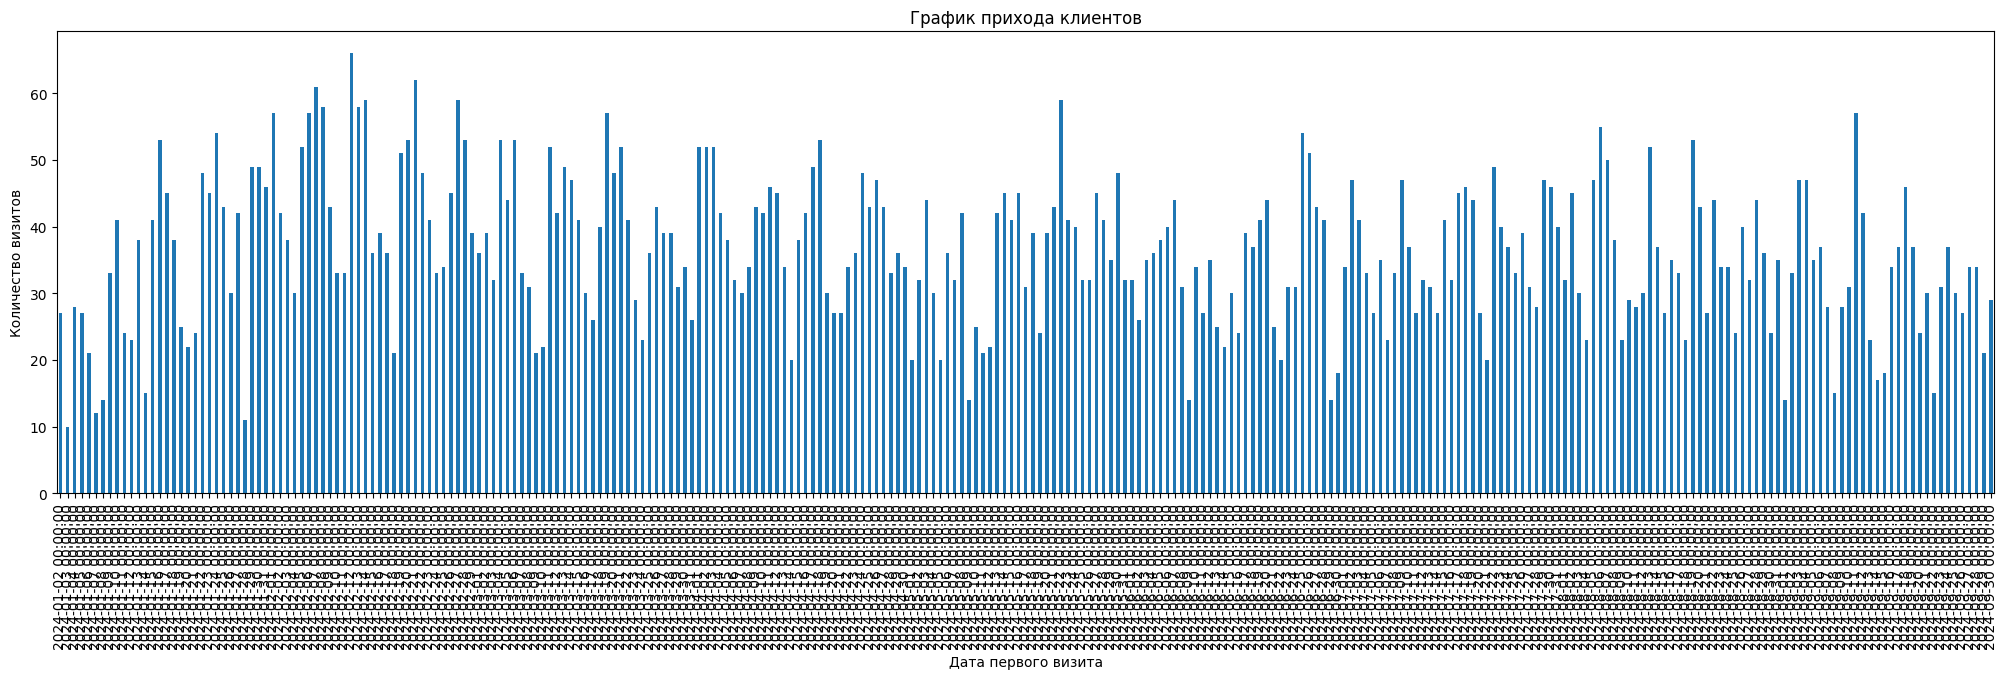

In [31]:
first_visit = initial_appointments['Первый визит'].value_counts().sort_index()
fig, axs = plt.subplots(figsize=(25, 6))
first_visit.plot(kind='bar', ax=axs)
plt.xlabel("Дата первого визита")
plt.ylabel("Количество визитов")
plt.title('График прихода клиентов')
plt.show()

In [23]:
initial_appointments['month'] = initial_appointments['Первый визит'].dt.month

In [24]:
initial_appointments['weekday'] = initial_appointments['Первый визит'].dt.day_name()

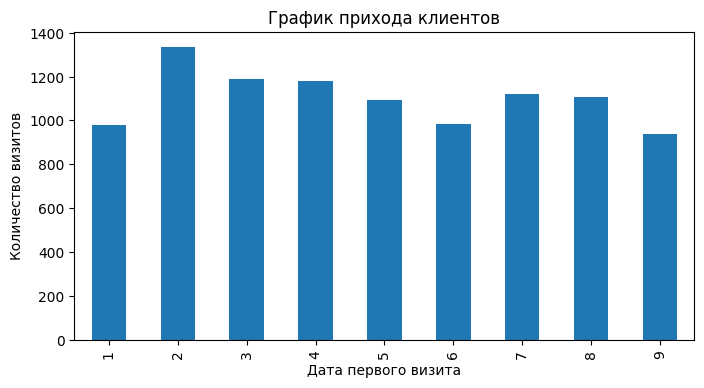

In [25]:
first_visit_month = initial_appointments['month'].value_counts().sort_index()
fig, axs = plt.subplots(figsize=(8, 4))
first_visit_month.plot(kind='bar', ax=axs)
plt.xlabel("Дата первого визита")
plt.ylabel("Количество визитов")
plt.title('График прихода клиентов')
plt.show()

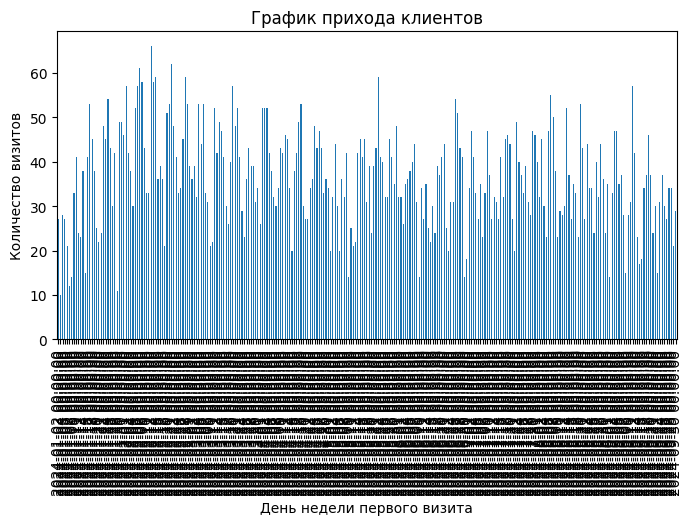

In [26]:
first_visit_wd = pd.Categorical(initial_appointments['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True).value_counts().sort_index()
fig, axs = plt.subplots(figsize=(8, 4))
first_visit.plot(kind='bar', ax=axs)
plt.xlabel("День недели первого визита")
plt.ylabel("Количество визитов")
plt.title('График прихода клиентов')
plt.show()

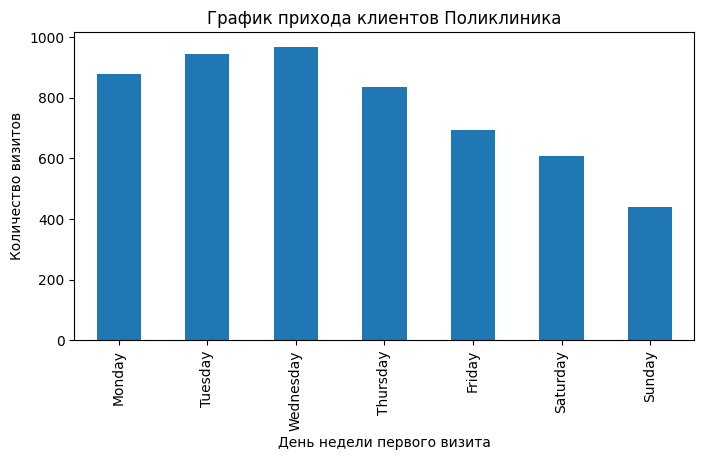

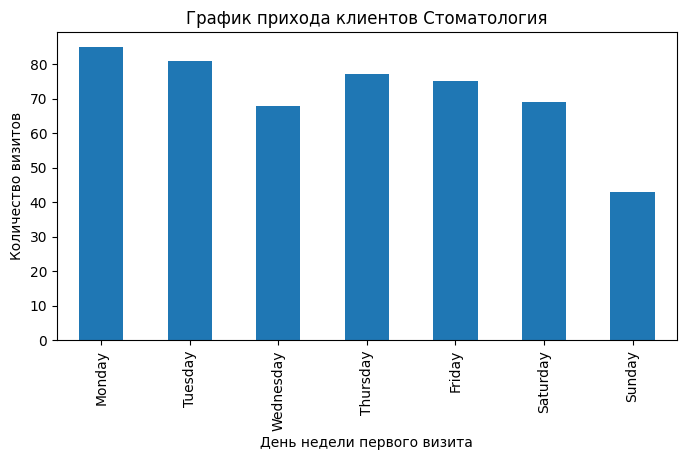

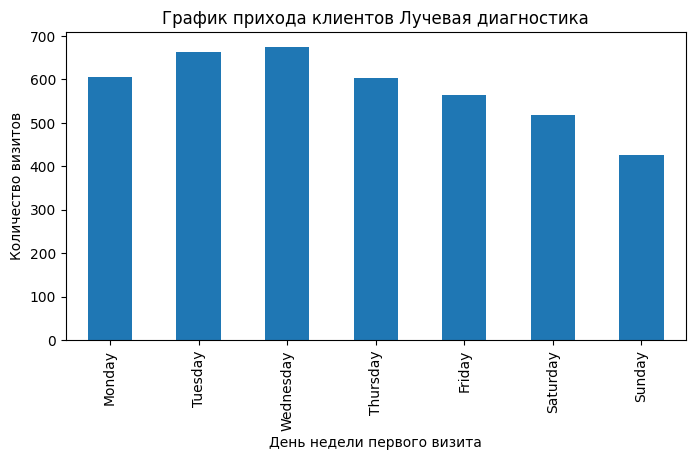

In [27]:
for name in ['Поликлиника', 'Стоматология', 'Лучевая диагностика']:
    first_visit_wd = pd.Categorical(initial_appointments[initial_appointments['Отделение'] == name]['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True).value_counts().sort_index()
    fig, axs = plt.subplots(figsize=(8, 4))
    first_visit_wd.plot(kind='bar', ax=axs)
    plt.xlabel("День недели первого визита")
    plt.ylabel("Количество визитов")
    plt.title(f'График прихода клиентов {name}')
    plt.show()

In [28]:
ia_not0 = initial_appointments.loc[initial_appointments['Ср. чек за месяц'] > 0]
ia_not0.shape[0]

9738

In [29]:
ia_not0[['Ср. чек за месяц', 'Траты за месяц']].describe()

,Ср. чек за месяц,Траты за месяц
count,9738.000000,9.738000e+03
mean,4831.154388,5.728467e+04
std,7935.966452,1.281122e+05
min,0.500000,1.000000e+00
25%,1068.500000,6.000000e+03
50%,2845.000000,1.660000e+04
75%,5280.000000,4.474650e+04
max,116019.090000,1.777481e+06


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning

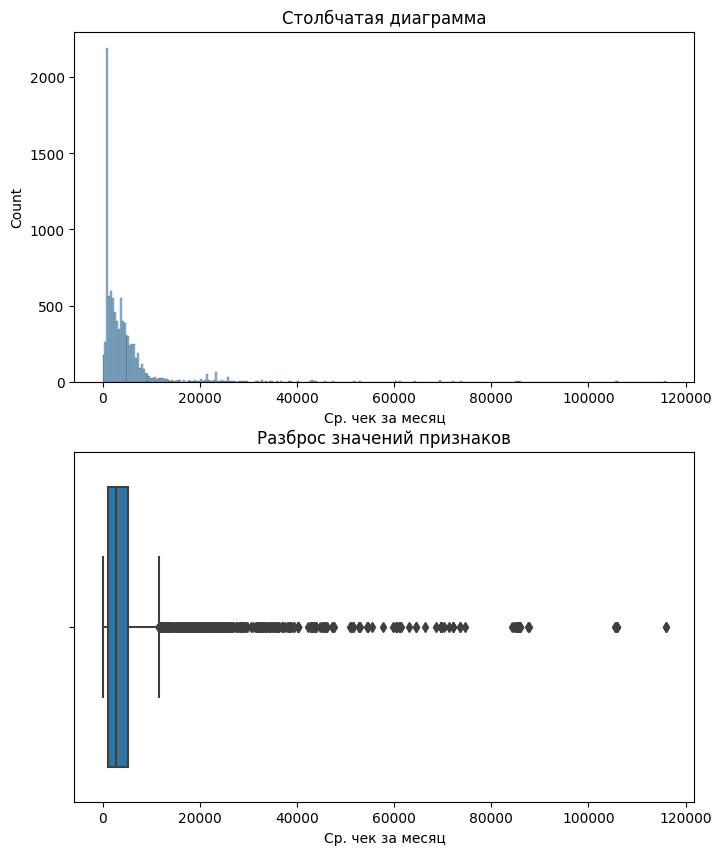

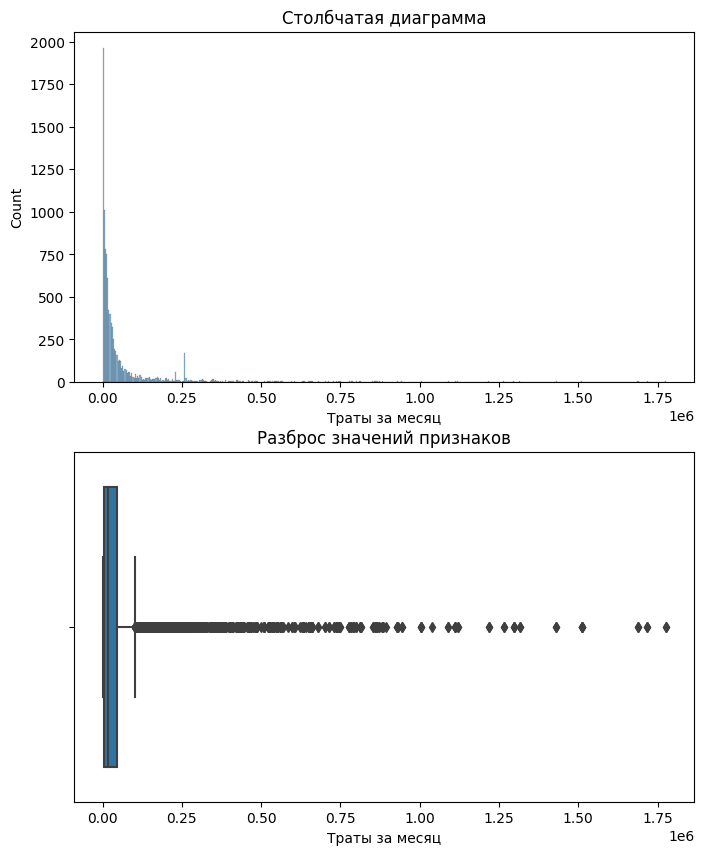

In [30]:
for name in ['Ср. чек за месяц', 'Траты за месяц']:
    fig, axes = plt.subplots(2, 1, figsize=(8, 10))
    sns.histplot(data = ia_not0, x = name, alpha=0.5, ax=axes[0]);
    axes[0].set_title('Столбчатая диаграмма')
    sns.boxplot(data=ia_not0, x=name, ax=axes[1])
    axes[1].set_title('Разброс значений признаков')